In [1]:
from data_utils import generate_psf_complex_fields, compute_output_fluxes_from_complex_field
from constants import TRAIN_FILE_SUFFIXES, \
                      TRAIN_COMPLEX_FIELDS_PREFIX, \
                      VALIDATION_COMPLEX_FIELDS_PATH, \
                      TEST_COMPLEX_FIELDS_PATH, \
                      TRAIN_OUTPUT_FLUXES_PREFIX, \
                      VALIDATION_OUTPUT_FLUXES_PATH, \
                      TEST_OUTPUT_FLUXES_PATH, \
                      NUMPY_SUFFIX

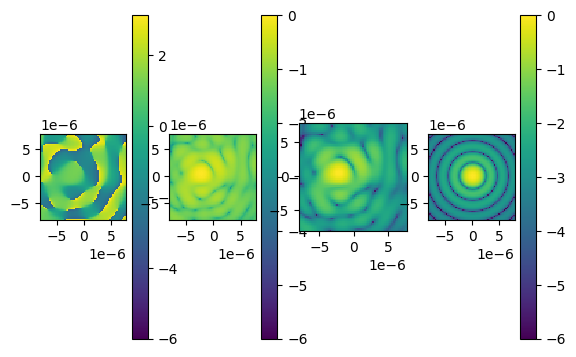

In [3]:
generate_psf_complex_fields('./a3.npy', n_samples=1, plot=True)


In [4]:
import numpy as np
a = np.load('./a3.npy')

(array([23., 22., 26., 18., 21., 25., 32., 25., 23., 26., 32., 52., 30.,
        35., 54., 51., 49., 60., 55., 43., 67., 90., 63., 44., 57., 39.,
        42., 39., 38., 44., 33., 47., 37., 58., 48., 64., 54., 65., 49.,
        52., 42., 39., 31., 28., 20., 23., 24., 28., 19., 13., 25., 12.,
        23., 24., 21., 27., 17., 23., 32., 41., 56., 47., 41., 57., 45.,
        46., 58., 67., 74., 77., 53., 46., 41., 32., 35., 45., 42., 54.,
        61., 50., 47., 48., 64., 45., 79., 55., 45., 45., 51., 48., 50.,
        28., 30., 35., 25., 26., 36., 19., 27., 22.]),
 array([-3.13743885e+00, -3.07465170e+00, -3.01186455e+00, -2.94907740e+00,
        -2.88629024e+00, -2.82350309e+00, -2.76071594e+00, -2.69792879e+00,
        -2.63514163e+00, -2.57235448e+00, -2.50956733e+00, -2.44678018e+00,
        -2.38399302e+00, -2.32120587e+00, -2.25841872e+00, -2.19563157e+00,
        -2.13284441e+00, -2.07005726e+00, -2.00727011e+00, -1.94448295e+00,
        -1.88169580e+00, -1.81890865e+00, -1.75612150e

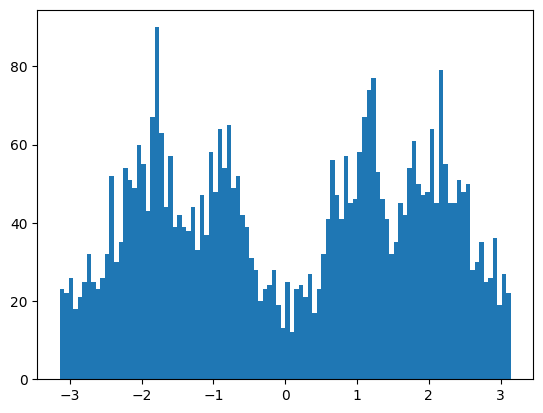

In [5]:
type(a[0,0,0])
import matplotlib.pyplot as plt
plt.hist(np.angle(a.ravel()), 100)

### Example

Total number of unique modes found: 19


/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:207: RuntimeWarning: invalid value encountered in divide
  field_sin = field_sin / np.sqrt(np.sum(field_sin**2))
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:222: RuntimeWarning: invalid value encountered in divide
  field_sin = field_sin / np.sqrt(np.sum(field_sin**2))
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:224: RuntimeWarning: invalid value encountered in divide
  field_sin_cart = field_sin_cart / np.sqrt(np.sum(field_sin_cart**2))
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:344: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if field_type is 'gaussian':
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:1705: SyntaxWarning: "is" with a li

ValueError: operands could not be broadcast together with shapes (72,72) (400,400) 

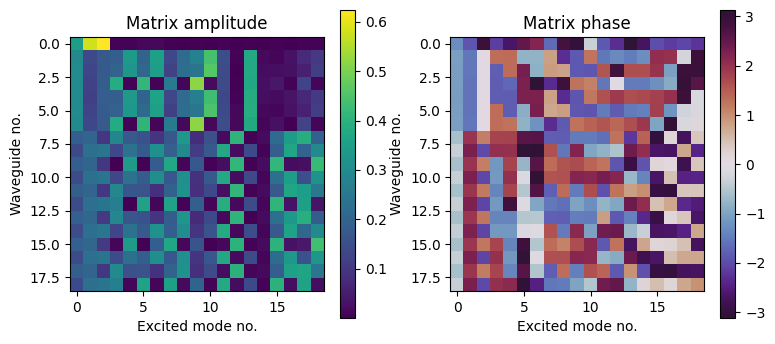

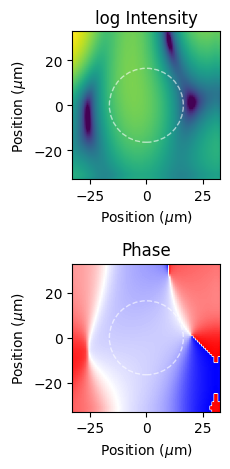

In [6]:
compute_output_fluxes_from_complex_field('./a3.npy', './a4.npy', plot=True, verbose=True)

# Generate Train data labels

In [ ]:
for fnumber in TRAIN_FILE_SUFFIXES:
    filepath = f"{TRAIN_COMPLEX_FIELDS_PREFIX}{fnumber}{NUMPY_SUFFIX}"
    generate_psf_complex_fields(filepath)

# Generate Validation data labels

In [ ]:
generate_psf_complex_fields(VALIDATION_COMPLEX_FIELD_PATH)


# Generate Test data labels

In [ ]:
generate_psf_complex_fields(TEST_COMPLEX_FIELD_PATH)

# Generate Train data features

Total number of unique modes found: 19
Total number of unique modes found: 19
Total number of unique modes found: 19
Total number of unique modes found: 19
Total number of unique modes found: 19


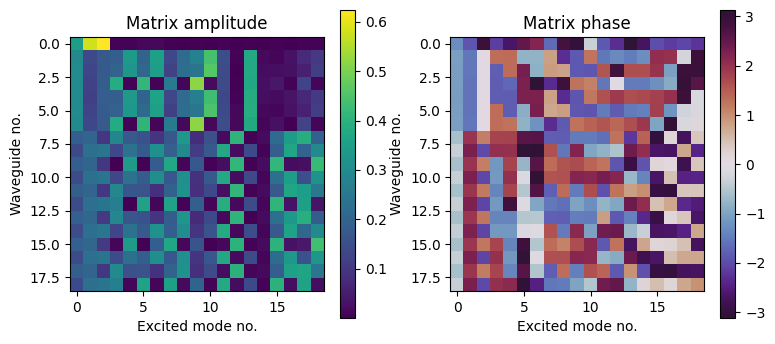

In [3]:
for fnumber in ["02", "03", "04", "05", "06"]:
    complex_fields_filepath = f"{TRAIN_COMPLEX_FIELDS_PREFIX}{fnumber}{NUMPY_SUFFIX}"
    output_fluxes_filepath = f"{TRAIN_OUTPUT_FLUXES_PREFIX}{fnumber}{NUMPY_SUFFIX}"
    compute_output_fluxes_from_complex_field(complex_fields_filepath, output_fluxes_filepath)

# Generate Validation data features

Total number of unique modes found: 19


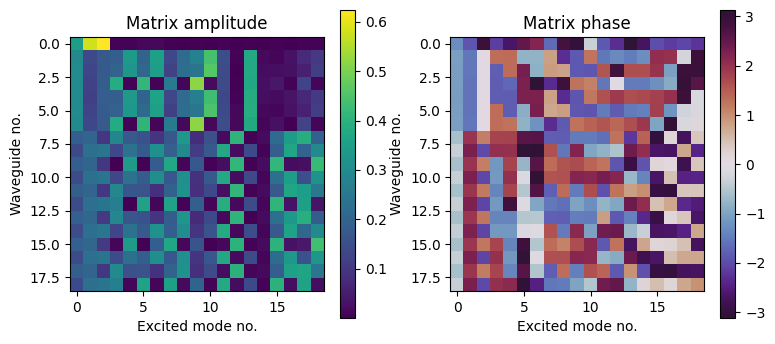

In [4]:
compute_output_fluxes_from_complex_field(VALIDATION_COMPLEX_FIELDS_PATH, VALIDATION_OUTPUT_FLUXES_PATH)

# Generate Test data features

Total number of unique modes found: 19


/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:207: RuntimeWarning: invalid value encountered in divide
  field_sin = field_sin / np.sqrt(np.sum(field_sin**2))
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:222: RuntimeWarning: invalid value encountered in divide
  field_sin = field_sin / np.sqrt(np.sum(field_sin**2))
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:224: RuntimeWarning: invalid value encountered in divide
  field_sin_cart = field_sin_cart / np.sqrt(np.sum(field_sin_cart**2))


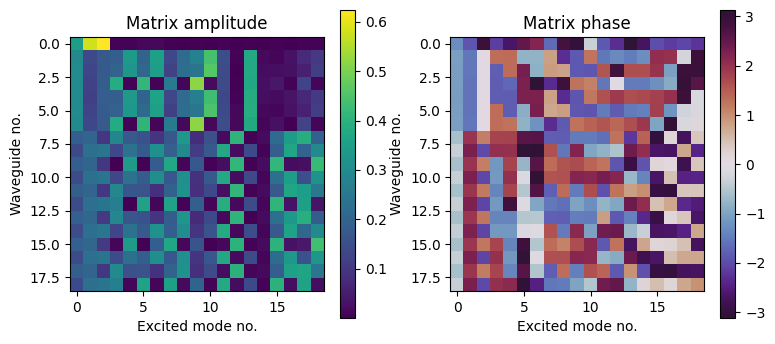

In [4]:
compute_output_fluxes_from_complex_field(TEST_COMPLEX_FIELDS_PATH, TEST_OUTPUT_FLUXES_PATH)